# importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight')  # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key
quandl.ApiConfig.api_key = 'CGMLdKtDsexwFXfkYohc'

In [2]:
#folder shortcut
path = r'/Users/drich/Desktop/Citi Bike'

In [3]:
citi = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'citi_NEW6.4.csv'), index_col = False)

In [4]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           4         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber        1968  female   
1             -73.987140            581  Subscriber        1983    male   
2             -73.988639            361  Subscriber        1989    male   
3             -73.967416            561  Subscriber        1988  female   
4             -73.983799            427  Subscriber        1986  female   

     end_of_ride        start_of_ride  
0   9/9/13 18:35  2013-09-09 18:18:00  
1  9/12/13 18:48  2013-09-12 18:38:00  
2  9/18/13 19:50  2013-09-18 19:44:00  
3  9/28/13 12:03  2013-09-28 11:54:00  
4  9/27/13 22:08  2013-09-27 22:01:00

Ride start date must be date time

In [5]:
# Define data types for specific columns
data_types = {
    'start_of_ride': 'datetime64'
}

In [6]:
file_path = os.path.join(path, '02 Data','Prepared data','citi_NEW6.4.csv')

In [7]:
parse_dates = ['start_of_ride']

In [8]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [9]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41017 entries, 0 to 41016
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               41017 non-null  int64         
 1   day_of_week              41017 non-null  object        
 2   start_hour               41017 non-null  int64         
 3   start_station_id         41017 non-null  int64         
 4   start_station_name       41017 non-null  object        
 5   start_station_latitude   41017 non-null  float64       
 6   start_station_longitude  41017 non-null  float64       
 7   end_station_id           41017 non-null  int64         
 8   end_station_name         41017 non-null  object        
 9   end_station_latitude     41017 non-null  float64       
 10  end_station_longitude    41017 non-null  float64       
 11  trip_duration            41017 non-null  int64         
 12  subscriber               41017 n

# cleaning wrangling subsetting

In [10]:
day_counts = citi.groupby( citi['start_of_ride'].dt.date)['start_of_ride'].count()

In [11]:
day_counts

start_of_ride
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: start_of_ride, dtype: int64

In [12]:
#avg duration trip on day
avg_ride_duration_day = citi.groupby('start_of_ride')['trip_duration'].mean()

In [13]:
avg_ride_duration_day

start_of_ride
2013-09-01 00:00:00     400.0
2013-09-01 00:08:00    1099.0
2013-09-01 00:09:00    1095.0
2013-09-01 00:16:00    1189.0
2013-09-01 00:21:00     713.0
                        ...  
2013-09-30 23:42:00     936.0
2013-09-30 23:49:00     983.0
2013-09-30 23:50:00     263.0
2013-09-30 23:54:00     685.0
2013-09-30 23:58:00     522.0
Name: trip_duration, Length: 21973, dtype: float64

In [15]:
weather = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'weather_data_nyc.csv'), index_col = False)

In [20]:
result

date  ride_count  avg_duration
0   2013-09-01         729    735.274348
1   2013-09-02         708    675.447740
2   2013-09-03        1331    686.549962
3   2013-09-04        1469    713.929204
4   2013-09-05        1372    712.066327
5   2013-09-06        1452    693.772039
6   2013-09-07        1134    731.380952
7   2013-09-08        1129    736.000000
8   2013-09-09        1393    691.850682
9   2013-09-10        1579    687.388220
10  2013-09-11        1532    674.304830
11  2013-09-12        1339    671.300971
12  2013-09-13        1630    688.204294
13  2013-09-14        1129    691.806023
14  2013-09-15        1169    722.729683
15  2013-09-16        1291    680.896979
16  2013-09-17        1596    681.016291
17  2013-09-18        1600    680.636875
18  2013-09-19        1578    687.445501
19  2013-09-20        1703    691.693482
20  2013-09-21        1165    700.793133
21  2013-09-22        1061    720.921772
22  2013-09-23        1498    699.183578
23  2013-09-24        1662    680.915162
24  2013-09-25        1598    701.739675
25  2013-09-26        1683    680.911468
26  2013-09-27        1535    711.543974
27  2013-09-28        1248    719.056090
28  2013-09-29        1102    704.512704
29  2013-09-30        1602    690.719725

In [16]:
weather.head()

date  maximum temperature  minimum temperature  average temperature  \
0  1-1-2016                   42                   34                 38.0   
1  2-1-2016                   40                   32                 36.0   
2  3-1-2016                   45                   35                 40.0   
3  4-1-2016                   36                   14                 25.0   
4  5-1-2016                   29                   11                 20.0   

  precipitation snow fall snow depth  
0          0.00       0.0          0  
1          0.00       0.0          0  
2          0.00       0.0          0  
3          0.00       0.0          0  
4          0.00       0.0          0

In [17]:
weather.tail()

date  maximum temperature  minimum temperature  \
361  27-12-2016                   60                   40   
362  28-12-2016                   40                   34   
363  29-12-2016                   46                   33   
364  30-12-2016                   40                   33   
365  31-12-2016                   44                   31   

     average temperature precipitation snow fall snow depth  
361                 50.0             0         0          0  
362                 37.0             0         0          0  
363                 39.5          0.39         0          0  
364                 36.5          0.01         T          0  
365                 37.5             0         0          0

In [18]:
data_sub = weather[['date','average temperature']]

In [19]:
data_sub

date  average temperature
0      1-1-2016                 38.0
1      2-1-2016                 36.0
2      3-1-2016                 40.0
3      4-1-2016                 25.0
4      5-1-2016                 20.0
..          ...                  ...
361  27-12-2016                 50.0
362  28-12-2016                 37.0
363  29-12-2016                 39.5
364  30-12-2016                 36.5
365  31-12-2016                 37.5

[366 rows x 2 columns]

In [20]:
# Set the "Date" column as the index

from datetime import datetime

citi['datetime'] = pd.to_datetime(citi['start_of_ride']) # Create a datetime column from "Date.""
citi = citi.set_index('datetime') # Set the datetime as the index of the dataframe.
citi.drop(['start_of_ride'], axis=1, inplace=True) # Drop the "Date" column.
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
datetime                                                                    
2013-09-09 18:18:00           0         Mon          18               523   
2013-09-12 18:38:00           1         Thu          18               257   
2013-09-18 19:44:00           2         Wed          19               479   
2013-09-28 11:54:00           3         Sat          11               527   
2013-09-27 22:01:00           4         Fri          22               293   

                          start_station_name  start_station_latitude  \
datetime                                                               
2013-09-09 18:18:00          W 38 St & 8 Ave               40.754666   
2013-09-12 18:38:00  Lispenard St & Broadway               40.719392   
2013-09-18 19:44:00          9 Ave & W 45 St               40.760193   
2013-09-28 11:54:00          E 33 St & 1 Ave               40.743156   
2013-09-27 22:01:00    Lafayette St & E 8 St               40.730287   

                     start_station_longitude  end_station_id  \
datetime                                                       
2013-09-09 18:18:00               -73.991382             334   
2013-09-12 18:38:00               -74.002472             236   
2013-09-18 19:44:00               -73.991255             513   
2013-09-28 11:54:00               -73.974347             441   
2013-09-27 22:01:00               -73.990765             432   

                        end_station_name  end_station_latitude  \
datetime                                                         
2013-09-09 18:18:00      W 20 St & 7 Ave             40.742388   
2013-09-12 18:38:00  St Marks Pl & 2 Ave             40.728419   
2013-09-18 19:44:00     W 56 St & 10 Ave             40.768254   
2013-09-28 11:54:00      E 52 St & 2 Ave             40.756014   
2013-09-27 22:01:00    E 7 St & Avenue A             40.726218   

                     end_station_longitude  trip_duration  subscriber  \
datetime                                                                
2013-09-09 18:18:00             -73.997262            993  Subscriber   
2013-09-12 18:38:00             -73.987140            581  Subscriber   
2013-09-18 19:44:00             -73.988639            361  Subscriber   
2013-09-28 11:54:00             -73.967416            561  Subscriber   
2013-09-27 22:01:00             -73.983799            427  Subscriber   

                     birth_year  gender    end_of_ride  
datetime                                                
2013-09-09 18:18:00        1968  female   9/9/13 18:35  
2013-09-12 18:38:00        1983    male  9/12/13 18:48  
2013-09-18 19:44:00        1989    male  9/18/13 19:50  
2013-09-28 11:54:00        1988  female  9/28/13 12:03  
2013-09-27 22:01:00        1986  female  9/27/13 22:08

In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points

I actually chose to set Date column as index on entire data set as there is still so much to divulge. I have a lot within my merged data set tha i need to look at before the final porject as it is going to be the absolute most beneficial to my data presentation.

That being said there is actually another dataset I would like to import to incorperate the average new york weather patterns as to compare to ride durations and average daily rides and how weather affects those patterns

In [21]:
# Set the "Date" column as the index

from datetime import datetime

weather['datetime'] = pd.to_datetime(weather['date']) # Create a datetime column from "Date.""
weather = weather.set_index('datetime') # Set the datetime as the index of the dataframe.
weather.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
weather.head()

maximum temperature  minimum temperature  average temperature  \
datetime                                                                    
2016-01-01                   42                   34                 38.0   
2016-02-01                   40                   32                 36.0   
2016-03-01                   45                   35                 40.0   
2016-04-01                   36                   14                 25.0   
2016-05-01                   29                   11                 20.0   

           precipitation snow fall snow depth  
datetime                                       
2016-01-01          0.00       0.0          0  
2016-02-01          0.00       0.0          0  
2016-03-01          0.00       0.0          0  
2016-04-01          0.00       0.0          0  
2016-05-01          0.00       0.0          0

In [22]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

average temperature
datetime                       
2016-01-01                 38.0
2016-02-01                 36.0
2016-03-01                 40.0
2016-04-01                 25.0
2016-05-01                 20.0

In [23]:
sub2 = citi[['trip_duration']]

In [24]:
sub2 

trip_duration
datetime                          
2013-09-09 18:18:00            993
2013-09-12 18:38:00            581
2013-09-18 19:44:00            361
2013-09-28 11:54:00            561
2013-09-27 22:01:00            427
...                            ...
2013-09-28 15:30:00            975
2013-09-01 16:27:00           1541
2013-09-14 17:32:00           1191
2013-09-07 18:08:00           1050
2013-09-23 21:54:00            370

[41017 rows x 1 columns]

In [25]:
sub3 = weather[['snow fall']]

In [26]:
sub3

snow fall
datetime            
2016-01-01       0.0
2016-02-01       0.0
2016-03-01       0.0
2016-04-01       0.0
2016-05-01       0.0
...              ...
2016-12-27         0
2016-12-28         0
2016-12-29         0
2016-12-30         T
2016-12-31         0

[366 rows x 1 columns]

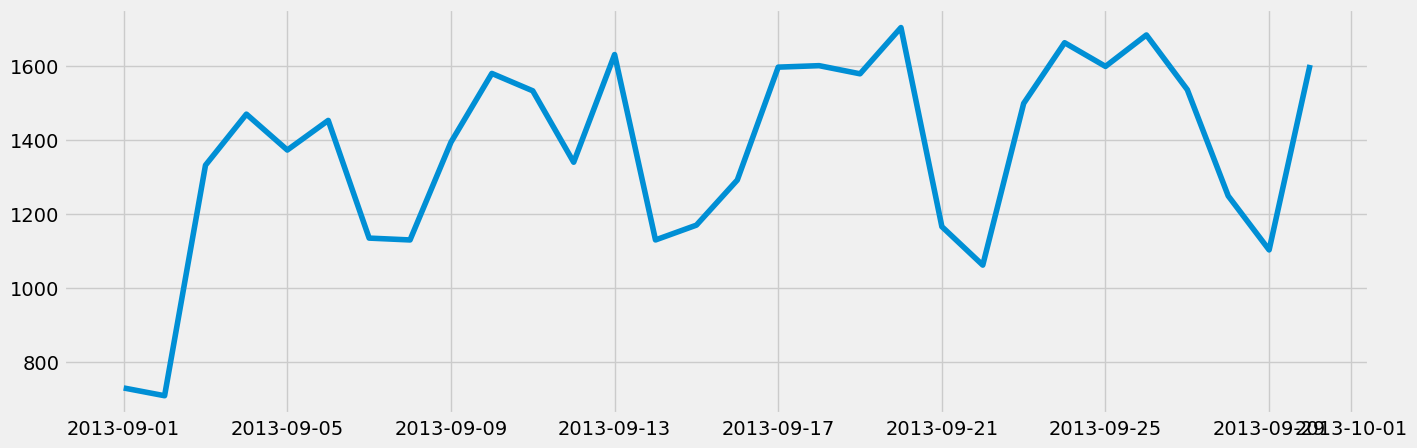

In [27]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

In [28]:
day_counts

start_of_ride
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: start_of_ride, dtype: int64

In [29]:
# Check for missing values (you shouldn't have any)

day_counts.isnull().sum() 

0

### Decomposition

In [30]:
# Reset index so that you can use the "Date" column as a filter

day_counts1 = citi.reset_index()

In [31]:
day_counts1

datetime  Unnamed: 0 day_of_week  start_hour  \
0     2013-09-09 18:18:00           0         Mon          18   
1     2013-09-12 18:38:00           1         Thu          18   
2     2013-09-18 19:44:00           2         Wed          19   
3     2013-09-28 11:54:00           3         Sat          11   
4     2013-09-27 22:01:00           4         Fri          22   
...                   ...         ...         ...         ...   
41012 2013-09-28 15:30:00       42988         Sat          15   
41013 2013-09-01 16:27:00       42989         Sun          16   
41014 2013-09-14 17:32:00       42990         Sat          17   
41015 2013-09-07 18:08:00       42991         Sat          18   
41016 2013-09-23 21:54:00       42992         Mon          21   

       start_station_id       start_station_name  start_station_latitude  \
0                   523          W 38 St & 8 Ave               40.754666   
1                   257  Lispenard St & Broadway               40.719392   
2                   479          9 Ave & W 45 St               40.760193   
3                   527          E 33 St & 1 Ave               40.743156   
4                   293    Lafayette St & E 8 St               40.730287   
...                 ...                      ...                     ...   
41012               435          W 21 St & 6 Ave               40.741740   
41013               224    Spruce St & Nassau St               40.711464   
41014               261     Johnson St & Gold St               40.694749   
41015               402       Broadway & E 22 St               40.740343   
41016               515         W 43 St & 10 Ave               40.760094   

       start_station_longitude  end_station_id          end_station_name  \
0                   -73.991382             334           W 20 St & 7 Ave   
1                   -74.002472             236       St Marks Pl & 2 Ave   
2                   -73.991255             513          W 56 St & 10 Ave   
3                   -73.974347             441           E 52 St & 2 Ave   
4                   -73.990765             432         E 7 St & Avenue A   
...                        ...             ...                       ...   
41012               -73.994156             448          W 37 St & 10 Ave   
41013               -74.005524             301         E 2 St & Avenue B   
41014               -73.983625             151  Cleveland Pl & Spring St   
41015               -73.989551             524           W 43 St & 6 Ave   
41016               -73.994618             488           W 39 St & 9 Ave   

       end_station_latitude  end_station_longitude  trip_duration  subscriber  \
0                 40.742388             -73.997262            993  Subscriber   
1                 40.728419             -73.987140            581  Subscriber   
2                 40.768254             -73.988639            361  Subscriber   
3                 40.756014             -73.967416            561  Subscriber   
4                 40.726218             -73.983799            427  Subscriber   
...                     ...                    ...            ...         ...   
41012             40.756604             -73.997901            975  Subscriber   
41013             40.722174             -73.983688           1541  Subscriber   
41014             40.721816             -73.997203           1191  Subscriber   
41015             40.755273             -73.983169           1050  Subscriber   
41016             40.756458             -73.993722            370  Subscriber   

       birth_year  gender    end_of_ride  
0            1968  female   9/9/13 18:35  
1            1983    male  9/12/13 18:48  
2            1989    male  9/18/13 19:50  
3            1988  female  9/28/13 12:03  
4            1986  female  9/27/13 22:08  
...           ...     ...            ...  
41012        1973    male  9/28/13 15:46  
41013        1975    male   9/1/13 16:52  
41014        1970  female  9/14/13 17:52  
41015  

In [32]:
# Reset index so that you can use the "Date" column as a filter

result_1 = data_sub.reset_index()

In [33]:
result_1

datetime  average temperature
0   2016-01-01                 38.0
1   2016-02-01                 36.0
2   2016-03-01                 40.0
3   2016-04-01                 25.0
4   2016-05-01                 20.0
..         ...                  ...
361 2016-12-27                 50.0
362 2016-12-28                 37.0
363 2016-12-29                 39.5
364 2016-12-30                 36.5
365 2016-12-31                 37.5

[366 rows x 2 columns]

In [34]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             366 non-null    datetime64[ns]
 1   average temperature  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [35]:
time_series = result_1['average temperature']

In [36]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [37]:
result_1.set_index('datetime', inplace=True)

In [ ]:
result_1.index.freq = 'D'

In [38]:
result_1[result_1.index.duplicated()]

Empty DataFrame
Columns: [average temperature]
Index: []

### Importing taxi data

In [41]:
taxi = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'sample_submission.csv'), index_col = False)

In [42]:
taxi 

key  fare_amount
0     2015-01-27 13:08:24.0000002        11.35
1     2015-01-27 13:08:24.0000003        11.35
2     2011-10-08 11:53:44.0000002        11.35
3     2012-12-01 21:12:12.0000002        11.35
4     2012-12-01 21:12:12.0000003        11.35
...                           ...          ...
9909  2015-05-10 12:37:51.0000002        11.35
9910  2015-01-12 17:05:51.0000001        11.35
9911  2015-04-19 20:44:15.0000001        11.35
9912  2015-01-31 01:05:19.0000005        11.35
9913  2015-01-18 14:06:23.0000006        11.35

[9914 rows x 2 columns]

In [43]:
type(taxi)

pandas.core.frame.DataFrame

In [44]:
# Set the "Date" column as the index

from datetime import datetime

taxi['datetime'] = pd.to_datetime(taxi['key']) # Create a datetime column from "Date.""
taxi = taxi.set_index('datetime') # Set the datetime as the index of the dataframe.
taxi.drop(['key'], axis=1, inplace=True) # Drop the "Date" column.
taxi.head()

fare_amount
datetime                                  
2015-01-27 13:08:24.000000200        11.35
2015-01-27 13:08:24.000000300        11.35
2011-10-08 11:53:44.000000200        11.35
2012-12-01 21:12:12.000000200        11.35
2012-12-01 21:12:12.000000300        11.35

In [45]:
taxi.sort_index(inplace=True)

In [46]:
result2 = taxi.reset_index()

In [47]:
taxi

fare_amount
datetime                                  
2009-01-01 11:04:24.000000100        11.35
2009-01-01 11:04:24.000000200        11.35
2009-01-01 11:04:24.000000300        11.35
2009-01-02 17:45:40.000000100        11.35
2009-01-02 17:45:40.000000200        11.35
...                                    ...
2015-06-30 20:03:50.000000100        11.35
2015-06-30 20:03:50.000000200        11.35
2015-06-30 20:03:50.000000300        11.35
2015-06-30 20:03:50.000000400        11.35
2015-06-30 20:03:50.000000500        11.35

[9914 rows x 1 columns]

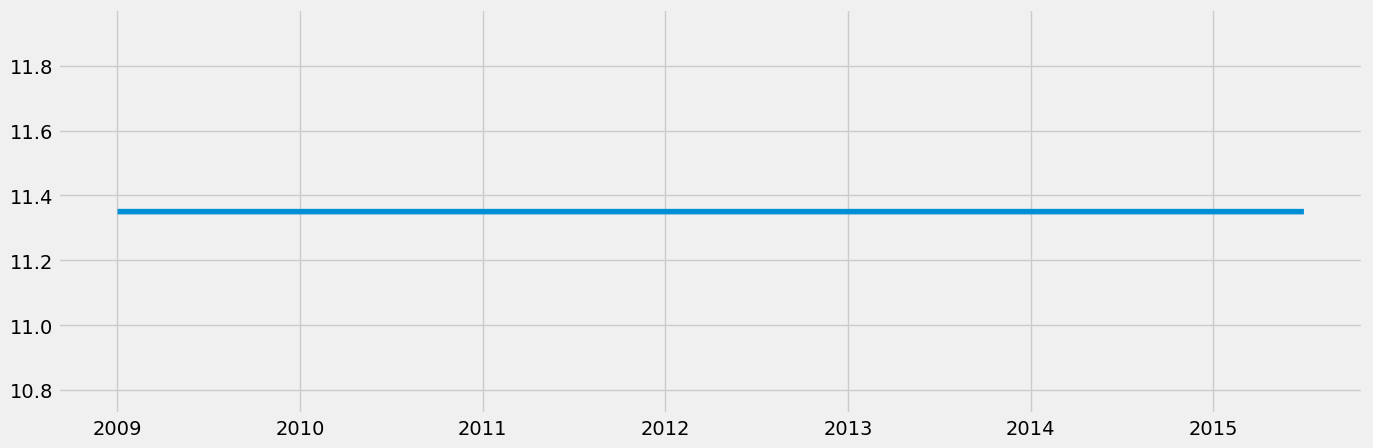

In [48]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(taxi)

In [49]:
taxi.head()

fare_amount
datetime                                  
2009-01-01 11:04:24.000000100        11.35
2009-01-01 11:04:24.000000200        11.35
2009-01-01 11:04:24.000000300        11.35
2009-01-02 17:45:40.000000100        11.35
2009-01-02 17:45:40.000000200        11.35

this seems strange that all of the fare amounts are 11.35

In [49]:
result

ride_count  avg_duration
datetime                            
2013-09-01         729    735.274348
2013-09-02         708    675.447740
2013-09-03        1331    686.549962
2013-09-04        1469    713.929204
2013-09-05        1372    712.066327
2013-09-06        1452    693.772039
2013-09-07        1134    731.380952
2013-09-08        1129    736.000000
2013-09-09        1393    691.850682
2013-09-10        1579    687.388220
2013-09-11        1532    674.304830
2013-09-12        1339    671.300971
2013-09-13        1630    688.204294
2013-09-14        1129    691.806023
2013-09-15        1169    722.729683
2013-09-16        1291    680.896979
2013-09-17        1596    681.016291
2013-09-18        1600    680.636875
2013-09-19        1578    687.445501
2013-09-20        1703    691.693482
2013-09-21        1165    700.793133
2013-09-22        1061    720.921772
2013-09-23        1498    699.183578
2013-09-24        1662    680.915162
2013-09-25        1598    701.739675
2013-09-26        1683    680.911468
2013-09-27        1535    711.543974
2013-09-28        1248    719.056090
2013-09-29        1102    704.512704
2013-09-30        1602    690.719725

In [50]:
column_to_drop = 'avg_duration'

In [51]:
result = result.drop(column_to_drop, axis=1)

In [52]:
result

ride_count
datetime              
2013-09-01         729
2013-09-02         708
2013-09-03        1331
2013-09-04        1469
2013-09-05        1372
2013-09-06        1452
2013-09-07        1134
2013-09-08        1129
2013-09-09        1393
2013-09-10        1579
2013-09-11        1532
2013-09-12        1339
2013-09-13        1630
2013-09-14        1129
2013-09-15        1169
2013-09-16        1291
2013-09-17        1596
2013-09-18        1600
2013-09-19        1578
2013-09-20        1703
2013-09-21        1165
2013-09-22        1061
2013-09-23        1498
2013-09-24        1662
2013-09-25        1598
2013-09-26        1683
2013-09-27        1535
2013-09-28        1248
2013-09-29        1102
2013-09-30        1602

In [55]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [56]:
result_1

datetime  ride_count
0  2013-09-01         729
1  2013-09-02         708
2  2013-09-03        1331
3  2013-09-04        1469
4  2013-09-05        1372
5  2013-09-06        1452
6  2013-09-07        1134
7  2013-09-08        1129
8  2013-09-09        1393
9  2013-09-10        1579
10 2013-09-11        1532
11 2013-09-12        1339
12 2013-09-13        1630
13 2013-09-14        1129
14 2013-09-15        1169
15 2013-09-16        1291
16 2013-09-17        1596
17 2013-09-18        1600
18 2013-09-19        1578
19 2013-09-20        1703
20 2013-09-21        1165
21 2013-09-22        1061
22 2013-09-23        1498
23 2013-09-24        1662
24 2013-09-25        1598
25 2013-09-26        1683
26 2013-09-27        1535
27 2013-09-28        1248
28 2013-09-29        1102
29 2013-09-30        1602

In [58]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [60]:
time_series = result_1['ride_count']

In [63]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [64]:
result_1.set_index('datetime', inplace=True)

In [65]:
result_1.index.freq = 'D'

In [66]:
time_series = result_1['ride_count']

In [67]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')


In [68]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

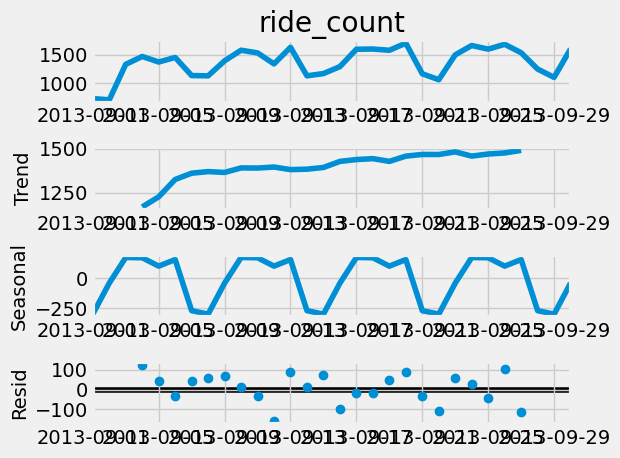

In [69]:
# Plot the separate components

decomposition.plot()
plt.show()

In [70]:
result_1

ride_count
datetime              
2013-09-01         729
2013-09-02         708
2013-09-03        1331
2013-09-04        1469
2013-09-05        1372
2013-09-06        1452
2013-09-07        1134
2013-09-08        1129
2013-09-09        1393
2013-09-10        1579
2013-09-11        1532
2013-09-12        1339
2013-09-13        1630
2013-09-14        1129
2013-09-15        1169
2013-09-16        1291
2013-09-17        1596
2013-09-18        1600
2013-09-19        1578
2013-09-20        1703
2013-09-21        1165
2013-09-22        1061
2013-09-23        1498
2013-09-24        1662
2013-09-25        1598
2013-09-26        1683
2013-09-27        1535
2013-09-28        1248
2013-09-29        1102
2013-09-30        1602

### Definitely needs smoothing. I have transfered back and forth between two laptops and a disk so much smoothing neccessary.

### Trend on incline means that more customers get into program as month progresses.

### Seasonality present

# Stationary?

In [71]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.728335
p-value                         0.003732
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


 P value is signifigant

     Null hypothesis needs to disprove unit root. Disproving unit root means the data is stationary. Presence of unit root means data is non-stationary--we cannot have that. 

P-value is satisfied

In [50]:
# No need to perform differencing

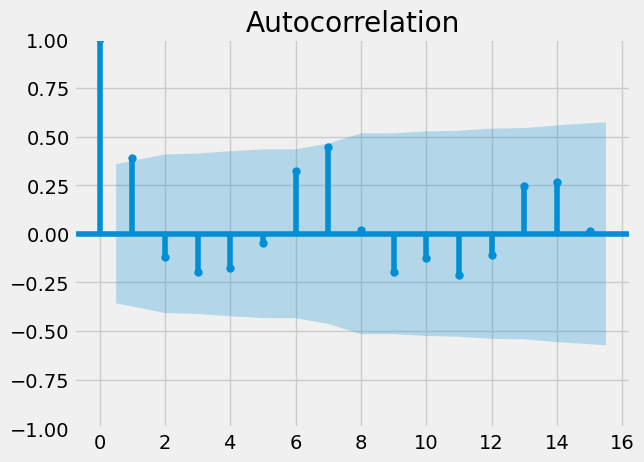

In [72]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [51]:
# saving to csv
citi.to_csv(os.path.join(path, '02 Data','Prepared data', 'citi_6.6.csv'))